# Generate Simulated Data: Case 5

- Traces with two masks and noise

In [1]:
#import python libraries
import random
from random import randint
from random import gauss
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Settings for jupyter notebook disbale in python
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4
fieldMasked2 = 44

# Define gauss niose
noiseStart = 0.0
noiseEnd = 0.1

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -4
    jitterRight = 4
else:
    jitterLeft = None
    jitterRight = None
    
# If masked used True 
maskedValue = True

In [3]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable['masked'] = maskedValue
settingsTable = settingsTable.drop(0,axis=True)

In [4]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [5]:
# Generate random plaintext
plaintext = []
mask = []
mask2 = []
for x in range(data_leng):
    plaintext.append(random.randint(0,255))
    mask.append(random.randint(0,255))
    mask2.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5],'\nmask2',mask2[0:5])

plaintext: [131, 217, 23, 180, 87] 
mask [189, 4, 26, 236, 209] 
mask2 [51, 148, 255, 189, 255]


In [6]:
# Verify size of plaintext
len(plaintext)

100000

In [7]:
# Verify size of mask
len(mask)

100000

In [8]:
# Verify size of mask2
len(mask2)

100000

In [9]:
#Generate the label with HW
labels = []
for d in plaintext:
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("\nlabels:",labels[0:5])


labels: [2, 4, 4, 2, 2]


In [10]:
maskedData = []
maskedNoise = []
maskedNoise2 = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex]^mask2[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise2.append((bin(mask2[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5],"\nmaskedNoise2:",maskedNoise2[0:5])

maskedData: [3.8736676241220485, 3.9039847092443107, 3.003792855354436, 5.115531378058556, 4.191248468343462] 
maskedNoise: [6.117958837562143, 0.8506394126995782, 3.0441230812875326, 5.174602526289114, 4.0917296955388665] 
maskedNoise2: [4.108198578834924, 2.87980672069248, 8.221162007756424, 5.955680062860488, 8.068252415618458]


In [11]:
# Verify size of maskedData 
len(maskedData)

100000

In [12]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in range(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        elif z == fieldMasked2:
            rawData.append(maskedNoise2[i])     
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1"))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])

First generated trace:  [2, 3, 5, 3, 6.117958837562143, 3, 3, 5, 4, 3, 4, 3, 4, 4, 5, 2, 6, 4, 3, 6, 4, 2, 4, 4, 3.8736676241220485, 3, 5, 5, 6, 3, 4, 2, 5, 4, 4, 3, 2, 4, 3, 2, 3, 5, 3, 3, 4.108198578834924, 4, 4, 4, 4, 6]
Second generated trace: [6, 3, 4, 5, 0.8506394126995782, 5, 4, 3, 4, 6, 3, 5, 3, 3, 6, 4, 4, 2, 3, 7, 7, 5, 4, 5, 3.9039847092443107, 5, 4, 3, 7, 4, 6, 2, 3, 5, 4, 4, 6, 1, 4, 5, 7, 6, 4, 5, 2.87980672069248, 4, 6, 3, 6, 4]
Third generated trace:  [3, 1, 7, 2, 3.0441230812875326, 4, 3, 6, 4, 4, 5, 5, 6, 5, 3, 3, 1, 4, 6, 2, 5, 3, 4, 6, 3.003792855354436, 4, 3, 4, 4, 4, 6, 4, 6, 2, 3, 5, 3, 5, 3, 2, 3, 2, 5, 4, 8.221162007756424, 5, 4, 3, 4, 5]


In [13]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

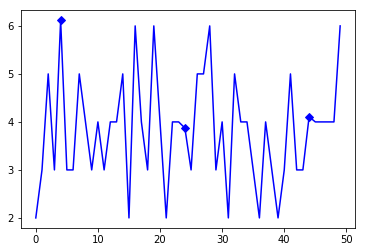

In [14]:
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2])

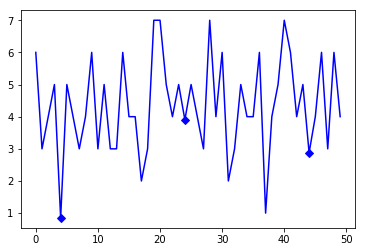

In [15]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2])

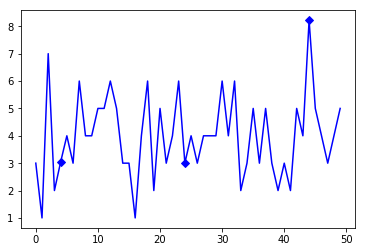

In [16]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2])

### Create Dataset

In [17]:
# Generate file id 
if activateJitter == False:
    fileID = 'E2M' + str(int((noiseEnd * 100))) + '_0'
else:  
    fileID = 'E' + str(int((noiseEnd * 100))) + '_' + str(int(jitterRight))

In [18]:
# Traces to csv 
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./Data/simulated_traces_'+ fileID +'.csv',index=False)

In [19]:
# Metadata to csv 
simulated_matadata = pd.DataFrame(plaintext)
simulated_matadata['labels'] = labels
simulated_matadata['mask'] = mask
simulated_matadata.rename(index=str, columns={0: "plaintext"})
simulated_matadata.to_csv('./Data/simulated_metadata_'+ fileID +'.csv',index=False)

In [20]:
# Settings to csv
settingsTable.to_csv('./Data/simulated_settingsTable_'+ fileID +'.csv',index=False)

In [21]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight,masked
0,100000,50,23,0.0,0.1,None,None,True
